# 模拟结果可视化

In [79]:
import os, sys
import pandas as pd 
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tqdm import tqdm

import scienceplots
plt.style.use(['science', 'nature', 'no-latex', 'notebook'])

this_path = os.path.abspath('.')
if this_path not in sys.path:
    sys.path.append(this_path)

extract_path = os.path.join(this_path, '../../data/extract')

import warnings
warnings.filterwarnings('ignore')

from plot_func import plot3D, saveEps
from utils import readOneFilePpinbar

import statsmodels.formula.api as smf


In [2]:
fig_path = os.path.join(this_path, 'figs')

## 1. p+和pi-

In [3]:
ppi_files = os.path.join(extract_path, '*single_p*/*CsI*.csv')

ppi_data = []
for ppi_file in glob(ppi_files):
    ppi_data.append(pd.read_csv(ppi_file, index_col=0))

ppi_data = pd.concat(ppi_data)

ppi_data['efficiency_err'] = (ppi_data.efficiency * (1-ppi_data.efficiency) / ppi_data['all']) ** 0.5 
ppi_data['1-efficiency'] = 1 - ppi_data.efficiency

ppi_data.columns = [i.replace('scale', 'resolution') for i in ppi_data.columns]

ppi_data

particle material  thickness      p  cos_theta     p_loc  p_loc_err  \
0    single_p+      CsI          2  0.325      0.025 -0.038441   0.000333   
1    single_p+      CsI          2  0.325      0.075 -0.038397   0.000246   
2    single_p+      CsI          2  0.325      0.125 -0.038380   0.000317   
3    single_p+      CsI          2  0.325      0.175 -0.038610   0.000301   
4    single_p+      CsI          2  0.325      0.225 -0.038958   0.000292   
..         ...      ...        ...    ...        ...       ...        ...   
94  single_pi-      CsI         10  1.150      0.450  0.001073   0.000085   
95  single_pi-      CsI         10  1.150      0.550  0.000969   0.000082   
96  single_pi-      CsI         10  1.150      0.650  0.000886   0.000079   
97  single_pi-      CsI         10  1.150      0.750  0.001107   0.000078   
98  single_pi-      CsI         10  1.150      0.850  0.001466   0.000102   

    p_resolution  p_resolution_err  theta_loc  theta_loc_err  \
0       0.007058          0.000282   0.003141       0.001355   
1       0.006545          0.000209   0.000236       0.001313   
2       0.006940          0.000268  -0.001204       0.001296   
3       0.006731          0.000255   0.001597       0.001399   
4       0.006398          0.000247  -0.000285       0.001557   
..           ...               ...        ...            ...   
94      0.006638          0.000070   0.000046       0.000117   
95      0.006497          0.000068   0.000085       0.000112   
96      0.006487          0.000065   0.000107       0.000137   
97      0.006212          0.000064   0.000194       0.000132   
98      0.006840          0.000084   0.000443       0.000180   

    theta_resolution  theta_resolution_err  efficiency   valid      all  \
0           0.045055              0.001145    0.735572  2256.0   3067.0   
1           0.044287              0.001109    0.744430  2339.0   3142.0   
2           0.041830              0.001091    0.722779  2237.0   3095.0   
3           0.045183              0.001182    0.710079  2170.0   3056.0   
4           0.044865              0.001315    0.692283  2180.0   3149.0   
..               ...                   ...         ...     ...      ...   
94          0.009771              0.000096    0.943922  9544.0  10111.0   
95          0.009990              0.000092    0.945066  9634.0  10194.0   
96          0.010487              0.000112    0.940014  9559.0  10169.0   
97          0.011217              0.000108    0.924102  9156.0   9908.0   
98          0.012890              0.000148    0.891932  8955.0  10040.0   

    delta_angle_one_sigma  efficiency_err  1-efficiency  
0                0.068274        0.007964      0.264428  
1                0.067022        0.007782      0.255570  
2                0.066799        0.008046      0.277221  
3                0.068546        0.008208      0.289921  
4                0.070140        0.008225      0.307717  
..                    ...             ...           ...  
94               0.015315        0.002288      0.056078  
95               0.015832        0.002257      0.054934  
96               0.016774        0.002355      0.059986  
97               0.018112        0.002661      0.075898  
98               0.020745        0.003098      0.108068  

[3456 rows x 19 columns]

##############################
single_p+ 1-efficiency


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


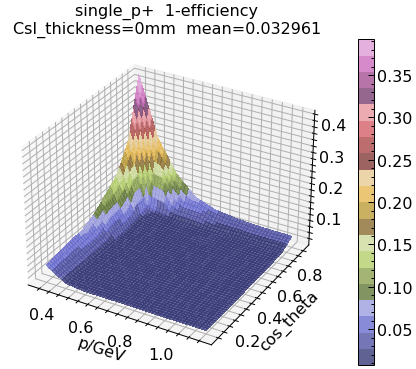

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


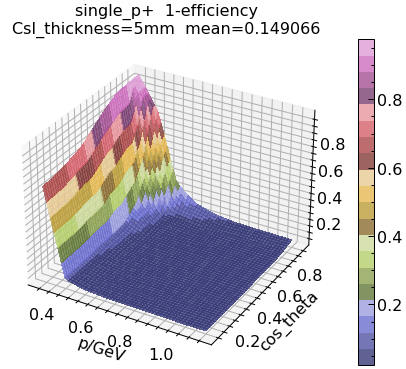

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


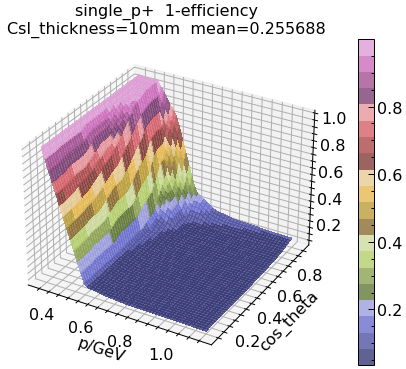

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


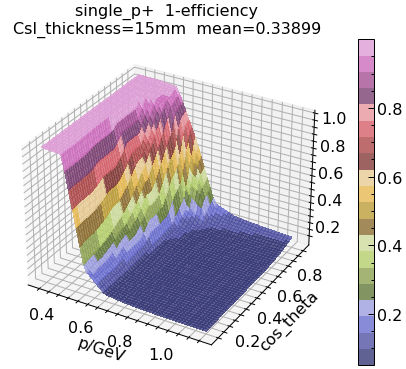

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


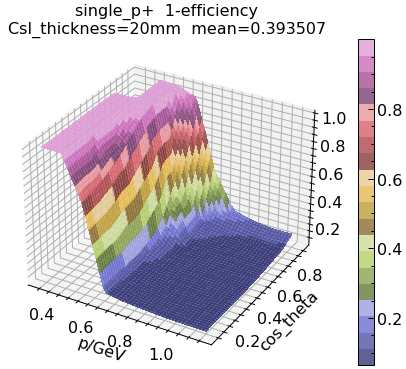

##############################
single_p+ p_resolution


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


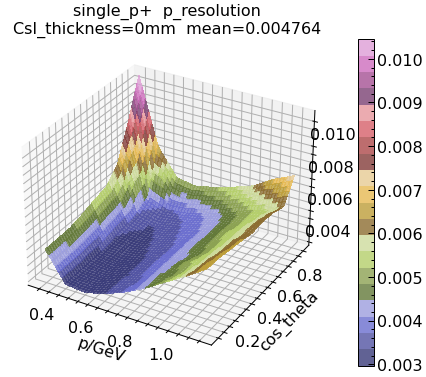

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


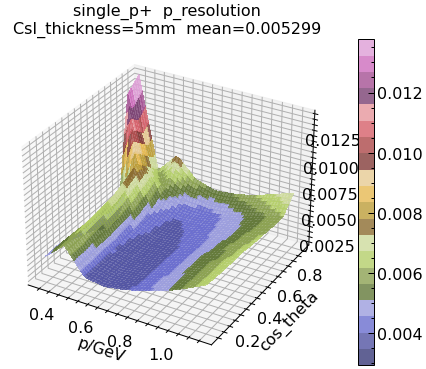

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


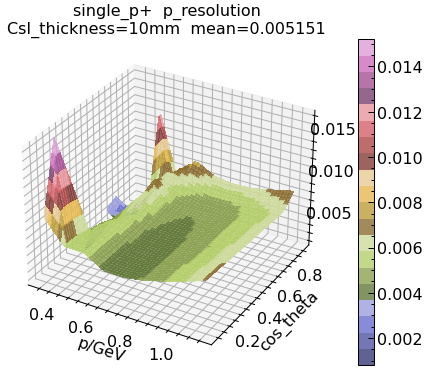

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


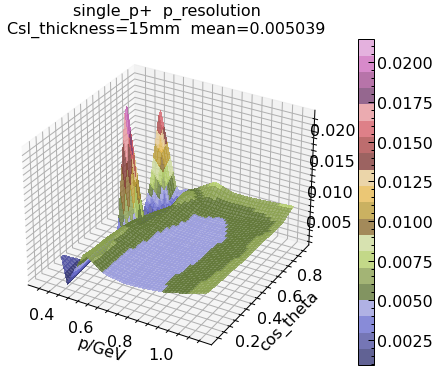

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


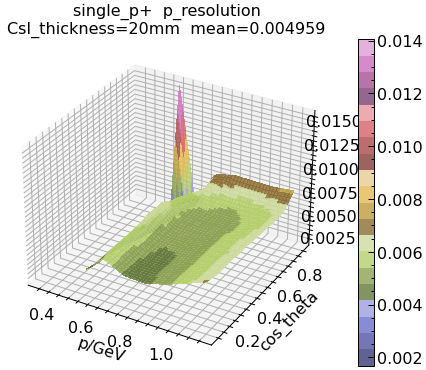

##############################
single_p+ theta_resolution


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


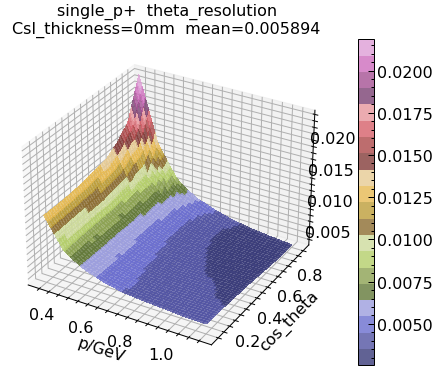

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


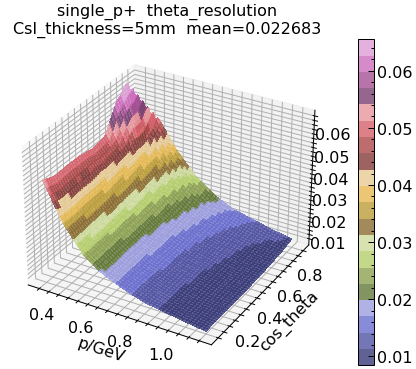

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


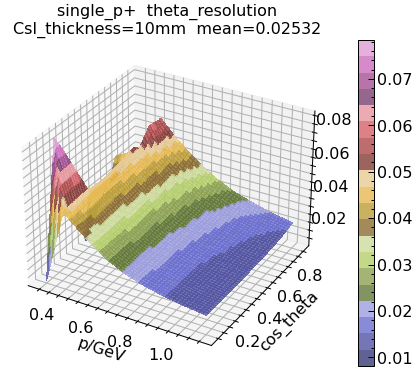

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


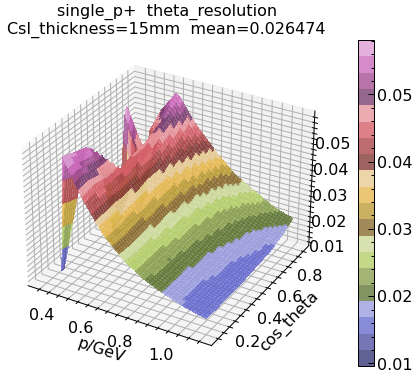

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


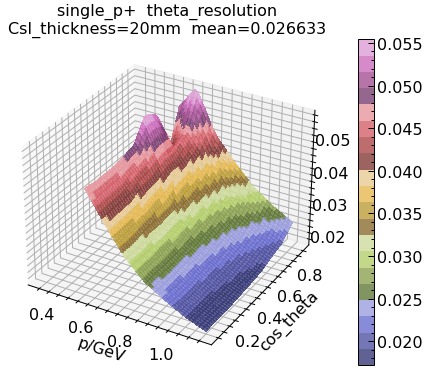

##############################
single_pi- 1-efficiency


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


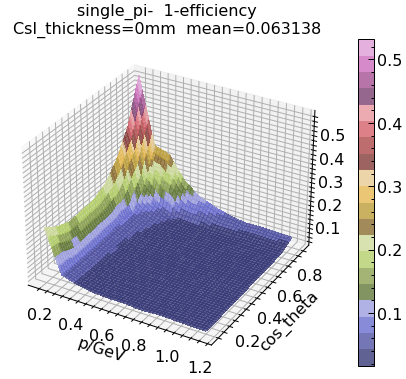

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


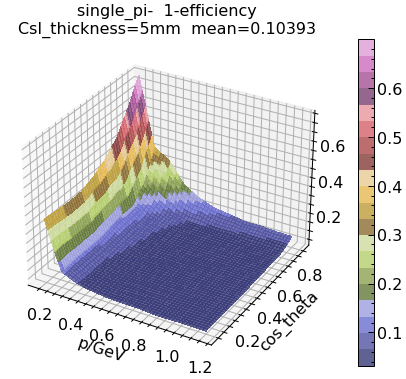

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


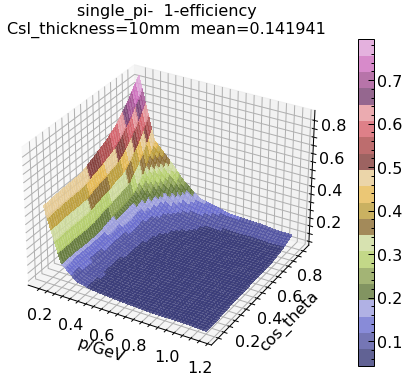

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


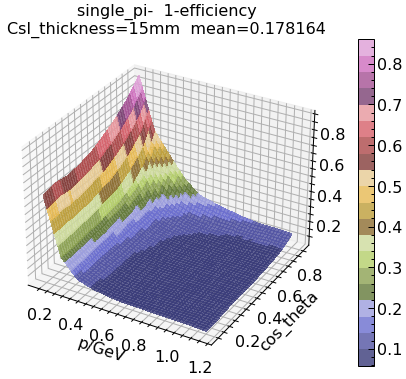

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


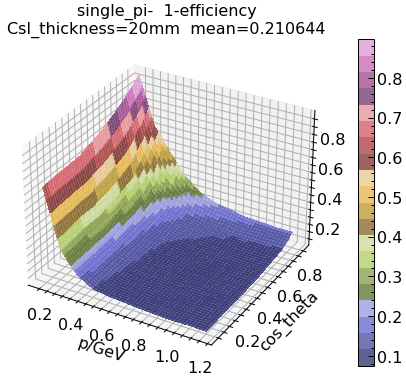

##############################
single_pi- p_resolution


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


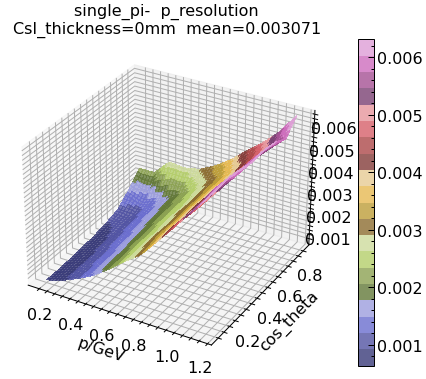

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


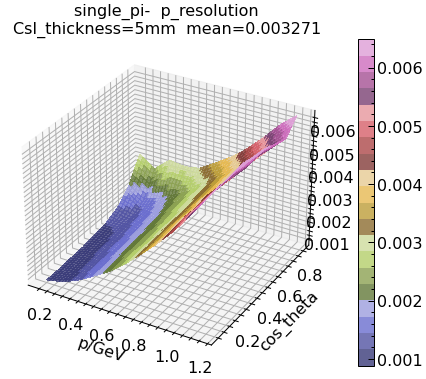

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


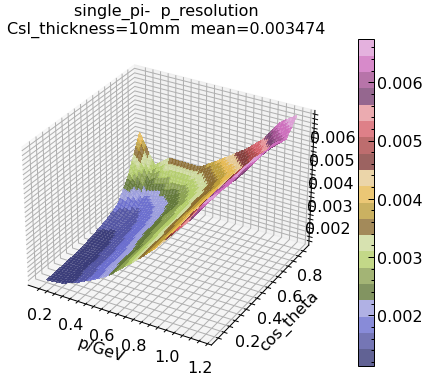

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


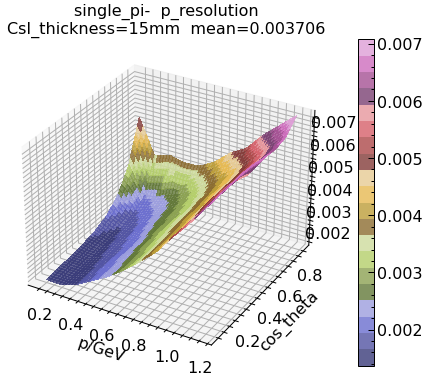

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


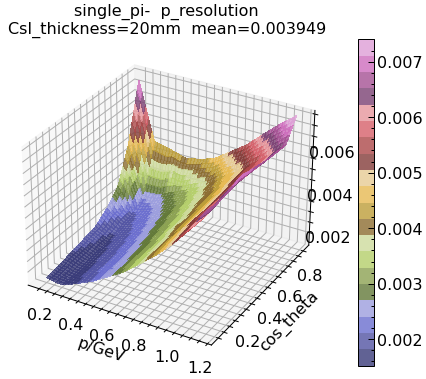

##############################
single_pi- theta_resolution


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


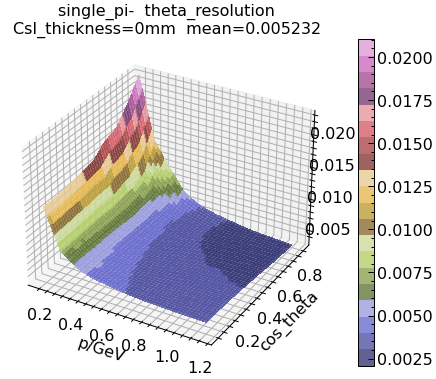

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


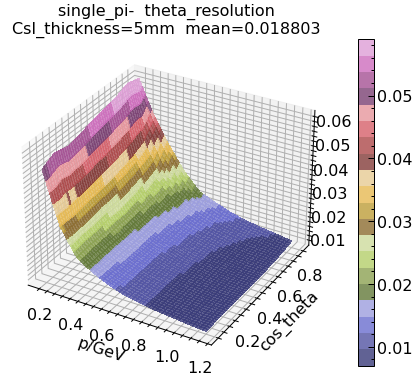

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


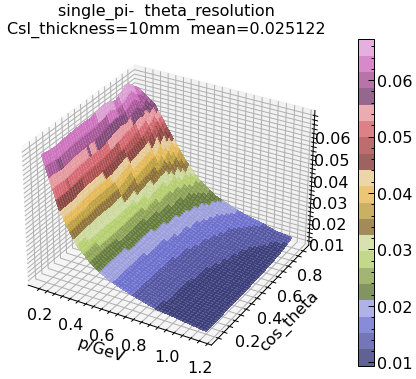

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


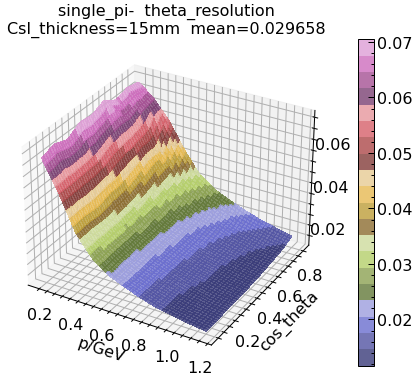

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


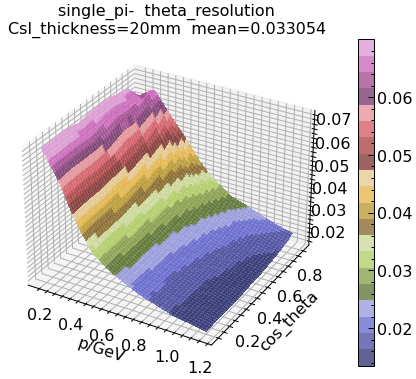

In [4]:
df = pd.DataFrame(columns=['particle', 'thickness', 'key', 'value'])

for particle in ['single_p+', 'single_pi-']:
    ppi_csi_data_particle = ppi_data[
        (ppi_data.particle==particle)
    ]
    for key in ['1-efficiency', 'p_resolution', 'theta_resolution']:
        print('#' * 30)
        print(particle, key)

        # 3d plots
        # for thickness in np.sort(ppi_csi_data_particle.thickness.unique()):
        for thickness in [0,5,10,15,20]:
            ppi_csi_data_particle_thickness = ppi_csi_data_particle[
            (ppi_csi_data_particle.thickness==thickness)
        ]       
            tmp = ppi_csi_data_particle_thickness[['p', 'cos_theta', key]]
            mean_value = (ppi_csi_data_particle_thickness[key] * ppi_csi_data_particle_thickness['all'] / ppi_csi_data_particle_thickness['all'].sum()).sum()
            title = '{}  {}\nCsI_thickness={}mm  mean={}'.format(particle, key, thickness, round(mean_value, 6))
            xlabel, ylabel = 'p/GeV', 'cos_theta'
            plot3D(tmp, title=title, xlabel=xlabel, ylabel=ylabel, save_eps='{}/single_ppi/{}_{}_{}.eps'.format(fig_path, particle, key, thickness))

            df.loc[df.shape[0]] = [particle, thickness, key, mean_value]

            
            

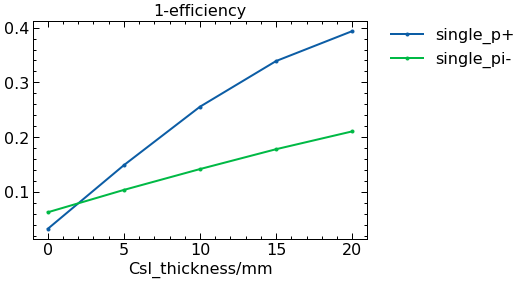

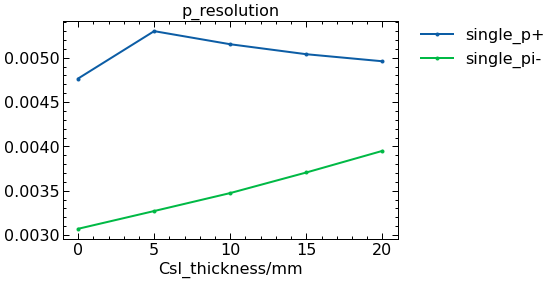

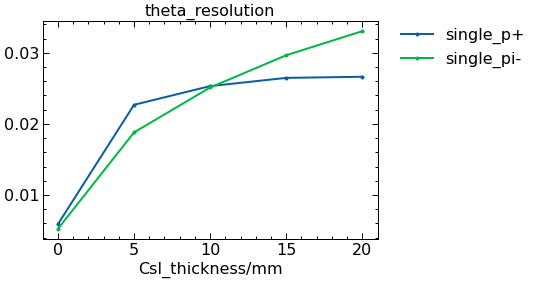

In [ ]:
for key in df.key.unique():
    tmp = df[df.key==key]
    for particle in df.particle.unique():
        plt.plot(tmp[tmp.particle==particle].thickness, tmp[tmp.particle==particle].value, 'o-', label=particle)
    plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
    plt.title(key)
    plt.xlabel('CsI_thickness/mm')
    plt.show()
    

##############################
single_p+ efficiency


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


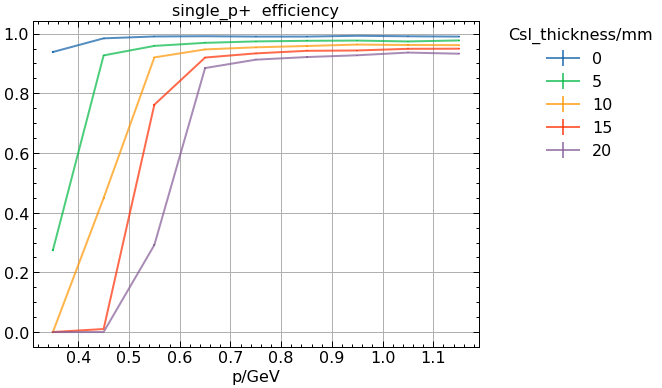

##############################
single_p+ p_resolution


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


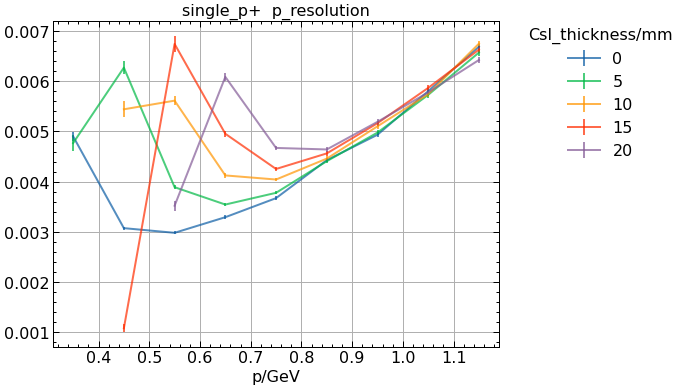

##############################
single_p+ theta_resolution


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


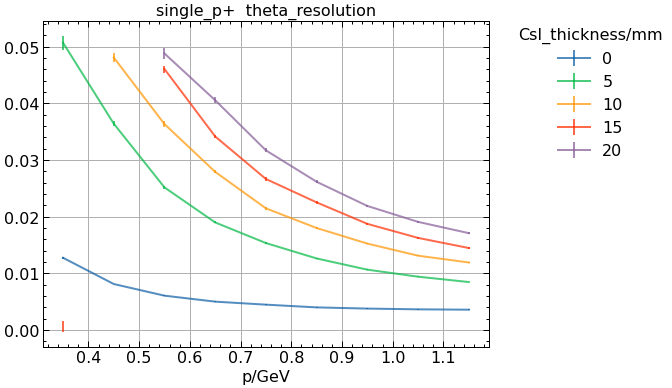

##############################
single_pi- efficiency


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


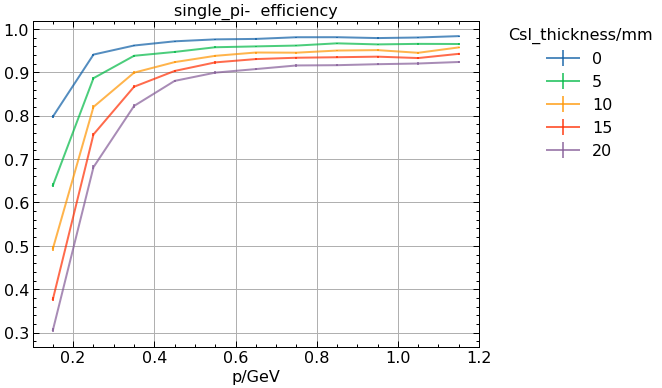

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


##############################
single_pi- p_resolution


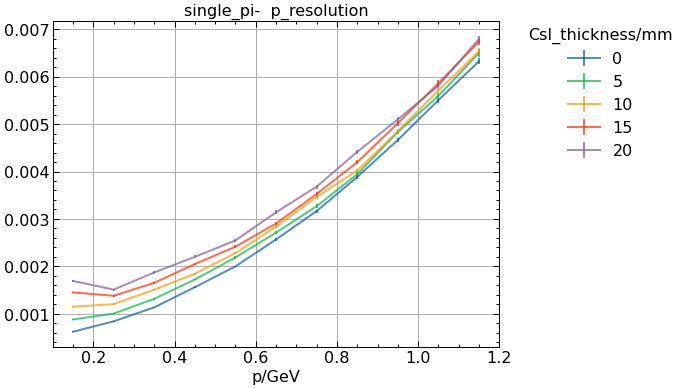

##############################
single_pi- theta_resolution


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


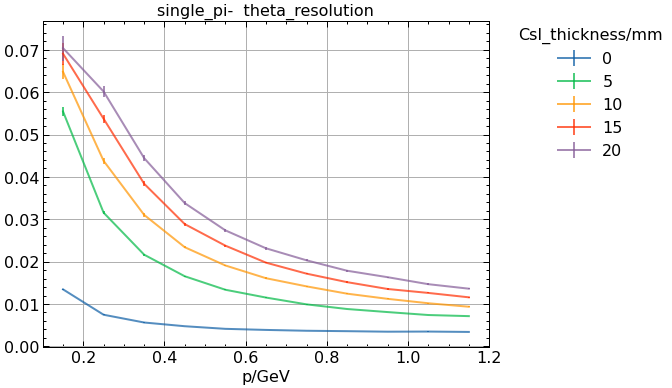

In [9]:
# p依赖
cos_theta = 0.15
for particle in ['single_p+', 'single_pi-']:
    ppi_csi_data_particle = ppi_data[
        (ppi_data.particle==particle) &
        (ppi_data.cos_theta==cos_theta)
    ]
    for key in ['efficiency', 'p_resolution', 'theta_resolution']:
        print('#' * 30)
        print(particle, key)

        key_err = key + '_err'
        tmp = pd.DataFrame(index=np.sort(ppi_csi_data_particle.p.unique()))
        tmp_err = tmp.copy()
        tmp.index.name = 'p/GeV'
        for thickness in np.sort(ppi_csi_data_particle.thickness.unique()):
            tmp_thickness = ppi_csi_data_particle[
                (ppi_csi_data_particle.thickness==thickness)
            ].set_index('p').reindex(tmp.index)
            tmp[thickness] = tmp_thickness[key]
            if key_err in ppi_csi_data_particle.columns:
                tmp_err[thickness] = tmp_thickness[key_err]

        if 'eff' not in key:
            tmp[tmp_err>0.003] = np.nan
            
        tmp.plot(alpha=0.7, style='o-', title='{}  {}'.format(particle, key), figsize=(8,6), yerr=tmp_err, grid=True)
        plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0., title='CsI_thickness/mm')
        saveEps(filename='{}/single_ppi/{}_{}.eps'.format(fig_path, particle, key, thickness))
        plt.show()

## 2. ppinbar

In [13]:
# 反冲质量分布
ppinbar_files = os.path.join(this_path, '../../data/gen', 'p+pi-nbar/phsp/add_CsI/*/0.root')

In [14]:
wtrecoilmass_data = {}
for file in glob(ppinbar_files):
    thickness = int(file.replace('\\', '/').split('/')[-2])
    wtrecoilmass_data[thickness] = readOneFilePpinbar(file)[0].wtrecoilmass


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


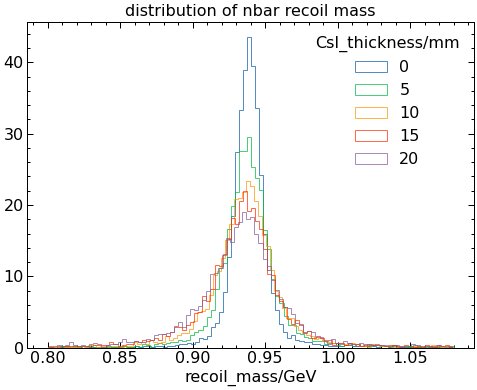

In [23]:
for k in sorted(wtrecoilmass_data.keys()):
    plt.hist(wtrecoilmass_data[k], bins=100, histtype='step', alpha=0.7, density=True, label=k)
# plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0., title='CsI_thickness/mm')
plt.legend(title='CsI_thickness/mm')
plt.xlabel('recoil_mass/GeV')
plt.title('distribution of nbar recoil mass')
saveEps(filename='{}/ppinbar/recoil_mass.eps'.format(fig_path))
plt.show()

In [16]:
ppinbar_files = os.path.join(extract_path, 'p+pi-nbar/*CsI*.csv')

ppinbar_data = []
for ppinbar_file in glob(ppinbar_files):
    ppinbar_data.append(pd.read_csv(ppinbar_file, index_col=0))

ppinbar_data = pd.concat(ppinbar_data)

ppinbar_data.columns = [i.replace('scale', 'resolution') for i in ppinbar_data.columns]
ppinbar_data.index = np.array(ppinbar_data.index).round(2)

ppinbar_data['efficiency_err'] = (ppinbar_data.efficiency * (1-ppinbar_data.efficiency) / ppinbar_data['all']) ** 0.5 
ppinbar_data['1-efficiency'] = 1 - ppinbar_data.efficiency

ppinbar_data

particle material  thickness     p  cos_theta     p_loc  p_loc_err  \
0   p+pi-nbar      CsI          3  0.15       0.05  0.008911   0.001828   
1   p+pi-nbar      CsI          3  0.15       0.15  0.002460   0.002003   
2   p+pi-nbar      CsI          3  0.15       0.25  0.006299   0.002261   
3   p+pi-nbar      CsI          3  0.15       0.35  0.004740   0.002212   
4   p+pi-nbar      CsI          3  0.15       0.45  0.004270   0.001899   
..        ...      ...        ...   ...        ...       ...        ...   
94  p+pi-nbar      CsI          5  1.15       0.45  0.000525   0.000236   
95  p+pi-nbar      CsI          5  1.15       0.55  0.000932   0.000187   
96  p+pi-nbar      CsI          5  1.15       0.65  0.001072   0.000219   
97  p+pi-nbar      CsI          5  1.15       0.75  0.000821   0.000216   
98  p+pi-nbar      CsI          5  1.15       0.85  0.000630   0.000309   

    p_resolution  p_resolution_err  theta_loc  theta_loc_err  \
0       0.028046          0.001494   0.005639       0.004655   
1       0.030038          0.001636   0.008219       0.003843   
2       0.029778          0.001856   0.024088       0.003615   
3       0.030276          0.001811  -0.001391       0.005948   
4       0.027380          0.001562   0.013950       0.007663   
..           ...               ...        ...            ...   
94      0.007599          0.000196   0.000584       0.000331   
95      0.007611          0.000154   0.000158       0.000302   
96      0.007588          0.000181   0.000440       0.000361   
97      0.007918          0.000178   0.000521       0.000401   
98      0.009659          0.000259   0.001966       0.000475   

    theta_resolution  theta_resolution_err  efficiency   valid     all  \
0           0.078146              0.003802    0.797500   319.0   400.0   
1           0.076597              0.003138    0.814815   330.0   405.0   
2           0.067768              0.002952    0.829843   317.0   382.0   
3           0.088368              0.004864    0.845953   324.0   383.0   
4           0.104269              0.006288    0.801008   318.0   397.0   
..               ...                   ...         ...     ...     ...   
94          0.013089              0.000271    0.721197  2385.0  3307.0   
95          0.013272              0.000247    0.687211  2230.0  3245.0   
96          0.014212              0.000296    0.680978  2284.0  3354.0   
97          0.014823              0.000327    0.617458  2016.0  3265.0   
98          0.016579              0.000388    0.458097  1536.0  3353.0   

    delta_angle_one_sigma  efficiency_err  1-efficiency  
0                0.207327        0.020093      0.202500  
1                0.223610        0.019302      0.185185  
2                0.220433        0.019226      0.170157  
3                0.220470        0.018446      0.154047  
4                0.222800        0.020037      0.198992  
..                    ...             ...           ...  
94               0.020198        0.007798      0.278803  
95               0.020413        0.008139      0.312789  
96               0.021748        0.008048      0.319022  
97               0.023462        0.008506      0.382542  
98               0.025811        0.008604      0.541903  

[891 rows x 19 columns]

In [58]:
num_p_df = pd.DataFrame()
efficiency_df = pd.DataFrame()

total_res = pd.DataFrame()

for key in ['efficiency', 'p_resolution', 'theta_resolution', 'valid']:
# for key in ['efficiency']:
    print('#' * 30)
    print(key)

    # 3d plots
    # for thickness in np.sort(ppinbar_data.thickness.unique()):
    for thickness in [0,5,10,15,20]:
        ppinbar_data_thickness = ppinbar_data[
        (ppinbar_data.thickness==thickness)
    ]       
        tmp = ppinbar_data_thickness[['p', 'cos_theta', key]]
        mean_value = (ppinbar_data_thickness[key] * ppinbar_data_thickness['all'] / ppinbar_data_thickness['all'].sum()).sum()
        title = '{}\nCsI_thickness={}mm  mean={}'.format(key, thickness, round(mean_value, 6))
        xlabel, ylabel = 'p/GeV', 'cos_theta'
        # plot3D(tmp, title=title, xlabel=xlabel, ylabel=ylabel, save_eps='{}/ppinbar/{}_{}.eps'.format(fig_path, key, thickness))


        if key =='efficiency':
            efficiency_df[thickness] = ppinbar_data_thickness.groupby('p').apply(lambda x: x.sum()['valid'] / x.sum()['all'])
        if key =='valid':
            num_p_df[thickness] = ppinbar_data_thickness.groupby('p').sum()['valid']
        if 'res' in key:
            total_res.loc[thickness, key] = (ppinbar_data_thickness[key] * ppinbar_data_thickness['all'] / ppinbar_data_thickness['all'].sum()).sum()
                   
            

##############################
efficiency
##############################
p_resolution
##############################
theta_resolution
##############################
valid


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0         5         10        15        20
0.15  0.819711  0.793430  0.764783  0.736137  0.701971
0.25  0.810752  0.783306  0.755448  0.727899  0.699938
0.35  0.798866  0.772334  0.743491  0.716079  0.685639
0.45  0.793422  0.766382  0.732779  0.699497  0.661256
0.55  0.787387  0.753186  0.709641  0.660857  0.614617
0.65  0.784315  0.734258  0.669083  0.601387  0.538795
0.75  0.765382  0.681975  0.607344  0.540695  0.487085
0.85  0.746832  0.658075  0.581989  0.518964  0.457121
0.95  0.763596  0.677567  0.596383  0.522361  0.455174
1.05  0.788268  0.728530  0.652982  0.575428  0.503938
1.15  0.757356  0.682699  0.616199  0.556574  0.501534

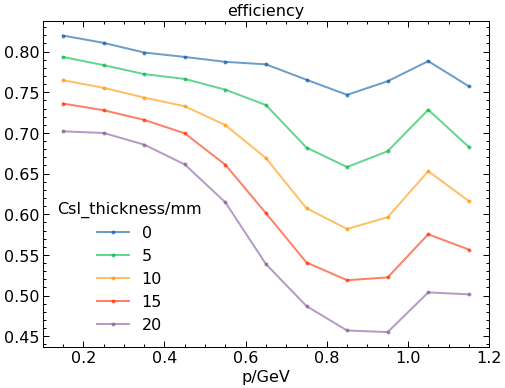

In [25]:
efficiency_df_copy = efficiency_df.copy()
(efficiency_df_copy).plot(style='o-', xlabel='p/GeV', alpha=0.6)
# plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0., title='CsI_thickness/mm')
plt.title('efficiency')
plt.legend(title='CsI_thickness/mm')
saveEps(filename='{}/ppinbar/efficiency.eps'.format(fig_path))

efficiency_df_copy.index = np.array(efficiency_df_copy.index).round(2)
efficiency_df_copy

0        5        10       15       20
0.15   3119.0   3019.0   2910.0   2801.0   2671.0
0.25   7887.0   7620.0   7349.0   7081.0   6809.0
0.35  14513.0  14031.0  13507.0  13009.0  12456.0
0.45  22242.0  21484.0  20542.0  19609.0  18537.0
0.55  31264.0  29906.0  28177.0  26240.0  24404.0
0.65  39484.0  36964.0  33683.0  30275.0  27124.0
0.75  46314.0  41267.0  36751.0  32718.0  29474.0
0.85  51807.0  45650.0  40372.0  36000.0  31710.0
0.95  55644.0  49375.0  43459.0  38065.0  33169.0
1.05  52650.0  48660.0  43614.0  38434.0  33659.0
1.15  22470.0  20255.0  18282.0  16513.0  14880.0

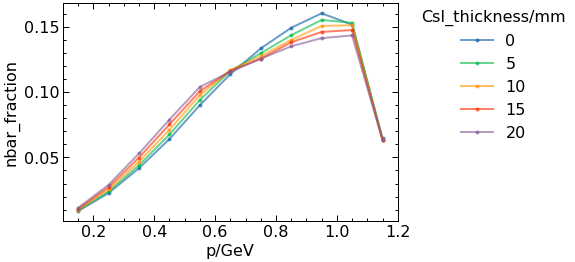

In [ ]:
num_p_df_copy = num_p_df.copy()
(num_p_df_copy/num_p_df_copy.sum()).plot(style='o-', xlabel='p/GeV', alpha=0.6, ylabel='nbar_fraction')
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0., title='CsI_thickness/mm')

num_p_df_copy.index = np.array(num_p_df_copy.index).round(2)
num_p_df_copy

## 3. nbar

In [10]:
n0_files = os.path.join(extract_path, '*n0*/*CsI*.csv')

n0_data = []
for n0_file in glob(n0_files):
    n0_data.append(pd.read_csv(n0_file, index_col=0))

n0_data = pd.concat(n0_data)

n0_data

particle material  thickness     p  cos_theta  annihilate_ratio  \
0   single_n0      CsI         15  0.15       0.05          0.338468   
1   single_n0      CsI         15  0.15       0.15          0.333881   
2   single_n0      CsI         15  0.15       0.25          0.347560   
3   single_n0      CsI         15  0.15       0.35          0.353462   
4   single_n0      CsI         15  0.15       0.45          0.364778   
..        ...      ...        ...   ...        ...               ...   
94  single_n0      CsI         20  1.15       0.45          0.114842   
95  single_n0      CsI         20  1.15       0.55          0.123365   
96  single_n0      CsI         20  1.15       0.65          0.134574   
97  single_n0      CsI         20  1.15       0.75          0.147793   
98  single_n0      CsI         20  1.15       0.85          0.186457   

    annihilate_num  scatter_ratio  scatter_num     all  
0           3120.0       0.188761       1740.0  9218.0  
1           3047.0       0.190335       1737.0  9126.0  
2           3184.0       0.189281       1734.0  9161.0  
3           3231.0       0.188601       1724.0  9141.0  
4           3341.0       0.198821       1821.0  9159.0  
..             ...            ...          ...     ...  
94          1074.0       0.175150       1638.0  9352.0  
95          1141.0       0.184236       1704.0  9249.0  
96          1265.0       0.198085       1862.0  9400.0  
97          1356.0       0.218420       2004.0  9175.0  
98          1699.0       0.257133       2343.0  9112.0  

[495 rows x 10 columns]

In [11]:
n0_data['annihilate_ratio_err'] = (n0_data.annihilate_num * (1-n0_data.annihilate_num) / n0_data['all']) ** 0.5 

n0_data['scatter_ratio_err'] = (n0_data.scatter_num * (1-n0_data.annihilate_num) / n0_data['all']) ** 0.5 

5 66345.0 916406.0
10 117493.0 916406.0
15 156626.0 916406.0
20 187034.0 916406.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


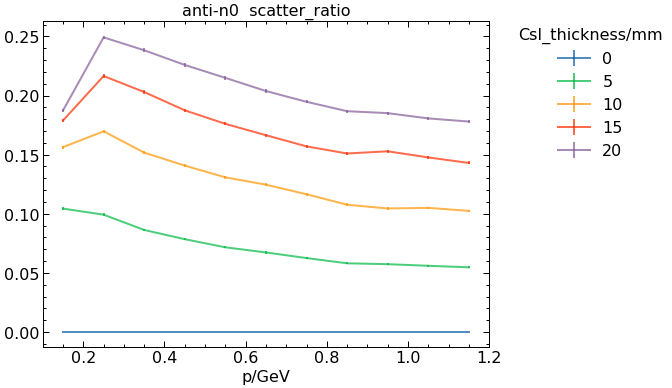

5 53381.0 916406.0
10 102496.0 916406.0
15 147787.0 916406.0
20 188208.0 916406.0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


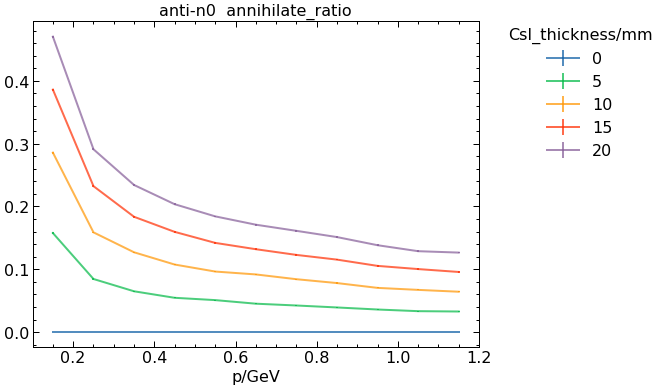

In [12]:
# 动量依赖
keys = ['scatter_ratio', 'annihilate_ratio']
nums = ['scatter_num', 'annihilate_num']
for key, num in zip(keys, nums):
    tmp = pd.DataFrame(index=np.sort(n0_data.p.unique()))
    tmp_err = tmp.copy()
    tmp.index.name = 'p/GeV'
    tmp.columns.name = 'CsI_thickness'
    # for thickness in np.sort(n0_data.thickness.unique()):
    df0 = n0_data[
            (n0_data.thickness==0)
        ].groupby('p').sum()
    for thickness in [0,5,10,15,20]:
        df = n0_data[
            (n0_data.thickness==thickness)
        ].groupby('p').sum()

        tmp[thickness] = df[num] / df['all']
        tmp_err[thickness] = (tmp[thickness] * (1-tmp[thickness]) / df['all']) ** 0.5

        if thickness > 0:
            total_eff = (df[num].sum()-df0[num].sum()) / df['all'].sum()
            # print(thickness, (1-total_eff)**(1/thickness))
            print(thickness, df[num].sum()-df0[num].sum(), df['all'].sum())



    # print(tmp.iloc[:,0])
    tmp = tmp.apply(lambda x: x-tmp.iloc[:,0], axis=0)
    tmp_err.iloc[:,0] = 0

    if key == 'scatter_ratio':
        scatter_ratio_p = tmp.copy()
    if key == 'annihilate_ratio':
        annihilate_ratio_p = tmp.copy()


    tmp.plot(alpha=0.7, style='o-', title='{}  {}'.format('anti-n0', key), figsize=(8,6), yerr=tmp_err)
    plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0., title='CsI_thickness/mm')
    saveEps(filename='{}/single_nbar/{}.eps'.format(fig_path, key))
    plt.show()

In [ ]:
(102496.0 ) / 916406.0

0.11184562300988864

In [141]:
scatter_ratio_p

CsI_thickness   0         5         10        15        20
p/GeV                                                     
0.15           0.0  0.104384  0.156383  0.178884  0.187367
0.25           0.0  0.099273  0.169750  0.216495  0.249187
0.35           0.0  0.086338  0.151762  0.202975  0.238292
0.45           0.0  0.078545  0.140730  0.187513  0.225882
0.55           0.0  0.071667  0.130847  0.176067  0.214942
0.65           0.0  0.067327  0.124644  0.166460  0.203819
0.75           0.0  0.062581  0.116526  0.157017  0.194710
0.85           0.0  0.058149  0.107690  0.150989  0.186761
0.95           0.0  0.057413  0.104515  0.152853  0.185118
1.05           0.0  0.056046  0.105041  0.147669  0.180656
1.15           0.0  0.054760  0.102461  0.143006  0.178015

In [146]:
eff = scatter_ratio_p.loc[0.25]
tmp = pd.DataFrame({'eff': eff, 'thi': eff.index})


fit = smf.ols(formula='np.power((1-eff), 1/thi) ~ 1', data=tmp).fit()
prob = 1 - fit.params.iloc[0]

print(eff)
print(prob)

x = np.arange(0, 21, 5)
total_efficiency_fit = 1 - (1-prob) ** x

total_efficiency_fit

CsI_thickness
0     0.000000
5     0.099273
10    0.169750
15    0.216495
20    0.249187
Name: 0.25, dtype: float64
0.01389716039600064


array([0.        , 0.06758115, 0.13059508, 0.18935046, 0.24413508])

In [134]:
eff = (scatter_ratio_p + scatter_ratio_p).mean()
tmp = pd.DataFrame({'eff': eff, 'thi': eff.index})

fit = smf.ols(formula='np.power((1-eff), 1/thi) ~ 1', data=tmp).fit()
prob = 1 - fit.params.iloc[0]

print(prob)

x = np.arange(0, 101, 5)
total_efficiency_fit = 1 - (1-prob) ** x

total_efficiency_fit

0.022675761331108824


array([0.        , 0.10835219, 0.20496418, 0.29110804, 0.36791804,
       0.4364055 , 0.4974722 , 0.55192218, 0.60047239, 0.64376208,
       0.68236124, 0.71677809, 0.74746581, 0.77482844, 0.79922627,
       0.82098054, 0.84037769, 0.85767312, 0.87309455, 0.88684503,
       0.89910562])

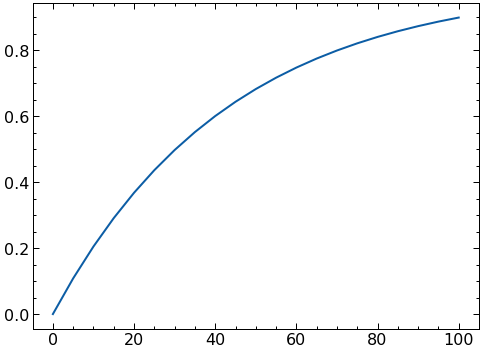

In [135]:
plt.plot(x, total_efficiency_fit)

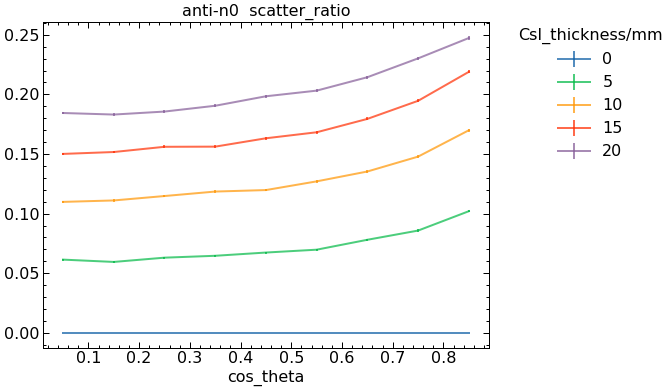

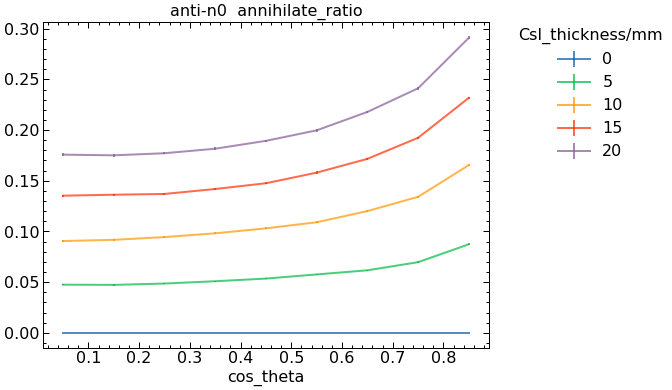

In [ ]:
# theta依赖

for key, num in zip(keys, nums):
    tmp = pd.DataFrame(index=np.sort(n0_data.cos_theta.unique()))
    tmp_err = tmp.copy()
    tmp.index.name = 'cos_theta'
    tmp.columns.name = 'CsI_thickness'
    for thickness in np.sort(n0_data.thickness.unique()):
        df = n0_data[
            (n0_data.thickness==thickness)
        ].groupby('cos_theta').sum()
        tmp[thickness] = df[num] / df['all']
        tmp_err[thickness] = (tmp[thickness] * (1-tmp[thickness]) / df['all']) ** 0.5

    tmp = tmp.apply(lambda x: x-tmp.iloc[:,0], axis=0)
    tmp_err.iloc[:,0] = 0

    tmp.plot(alpha=0.7, style='o-', title='{}  {}'.format('anti-n0', key), figsize=(8,6), yerr=tmp_err)
    plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0., title='CsI_thickness/mm')
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


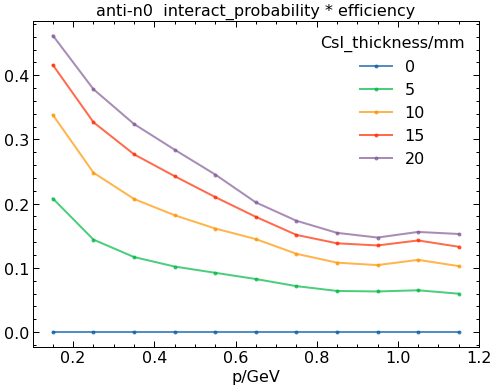

In [73]:
tmp = scatter_ratio_p + annihilate_ratio_p
tmp.index = efficiency_df_copy.index

(tmp * efficiency_df_copy).plot(alpha=0.7, style='o-', title='{}  {}'.format('anti-n0', 'interact_probability * efficiency'), figsize=(8,6))
plt.legend(title='CsI_thickness/mm')
# plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0., title='CsI_thickness/mm')
plt.xlabel('p/GeV')
saveEps(filename='{}/ppinbar/total_efficiency.eps'.format(fig_path))
plt.show()

In [37]:
all_series = ppinbar_data[
        (ppinbar_data.thickness==0)
    ].groupby('p').sum()['all']


In [54]:
total_eff = (tmp * efficiency_df_copy)
all_series.index = total_eff.index
total_eff = total_eff.apply(lambda x: x * all_series, axis=0) / all_series.sum()

total_eff = total_eff.sum()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


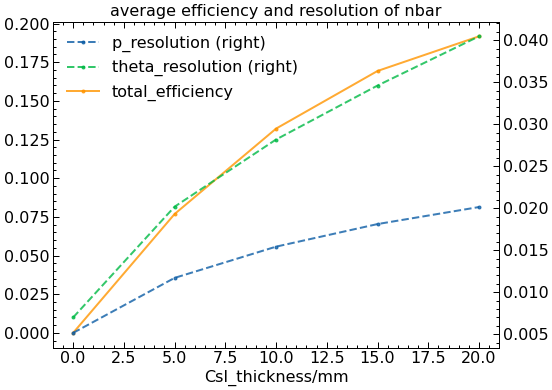

In [119]:
tmp = total_res.copy()
tmp['total_efficiency'] = total_eff

tmp.plot(secondary_y=['p_resolution', 'theta_resolution'], style=['o--', 'o--', 'o-', '.-'], alpha=0.8, xlabel='CsI_thickness/mm')
plt.title('average efficiency and resolution of nbar')
saveEps(filename='{}/ppinbar/efficiency_and_resolutions.eps'.format(fig_path))